In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import json
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, FuncFormatter

In [87]:
with open('config.json') as f:
    data = json.load(f)

if (data['dirName'] != ""):
    full_path = f"{data['dirPath']}/{data['dirName']}"
else:
    # get the most recently run experiment
    path = data['dirPath']
    folder_names = sorted([f for f in os.listdir(path) if os.path.isdir(os.path.join(path, f))])
    most_recent = folder_names[-1]
    print(f"defaulting to most recent experiment: {most_recent}")
    full_path = f"{path}/{most_recent}"

defaulting to most recent experiment: 2025_05_14_10:03:07.569900


In [88]:
csv_path = f"{full_path}/statistics.csv"
img_path = f"{full_path}/statistics.png"

In [89]:
df = pd.read_csv(csv_path)

In [90]:
df

,title,seconds,num_instructions,instructions_per_second
0,fusion::InstructionCountExperiment,3.721147,271036826384,7.283690e+10
1,fusion::InstructionCountExperiment,3.655183,271036826384,7.415136e+10
2,fusion::PipelineExperiment<fusion::InOrderPipe...,4.562234,271036826384,5.940879e+10
3,fusion::InstructionCountExperiment,3.717783,271036826384,7.290281e+10
4,fusion::InstructionCountExperiment,3.621696,271036826384,7.483698e+10
...,...,...,...,...
296,fusion::PipelineExperiment<fusion::InOrderPipe...,4.636959,271036826384,5.845141e+10
297,fusion::InstructionCountExperiment,3.615922,271036826384,7.495649e+10
298,fusion::InstructionCountExperiment,3.642767,271036826384,7.440411e+10
299,fusion::PipelineExperiment<fusion::InOrderPipe...,4.510934,271036826384,6.008442e+10


In [91]:
allowed_titles = ['fusion::InstructionCountExperiment', 'fusion::PipelineExperiment<fusion::InOrderPipeline>']
df = df[df['title'].isin(allowed_titles)]
grouped = df.groupby(['title'], dropna=False, sort=False)

In [92]:
reference_names  = ['KVM', 'QEMU', 'gem5', 'ChampSim']
reference_values = [2000000000, 366000000, 1000000, 142450]
reference_mins   = [1400000000, 218000000, 100000, 27777]
reference_maxs   = [4000000000, 500000000, 5000000, 450000]

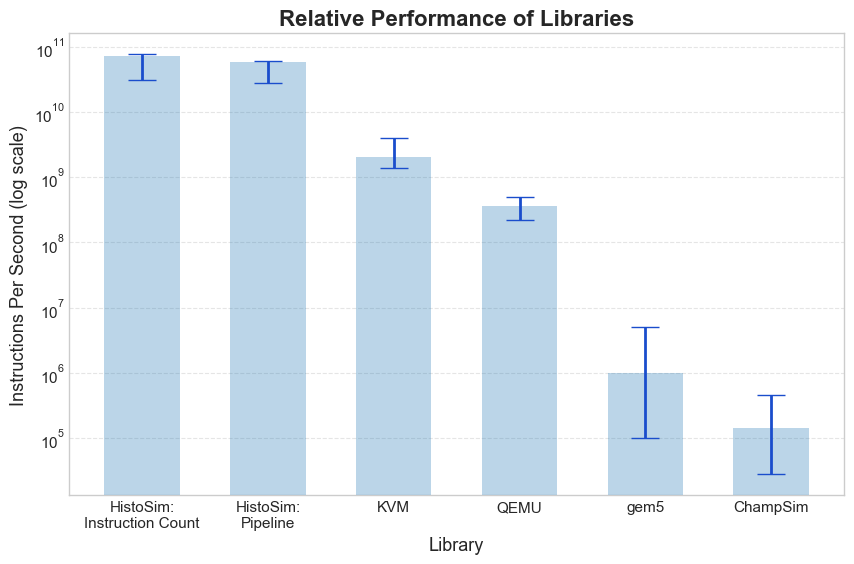

In [94]:
summary = (
    grouped['instructions_per_second']
        .agg(['mean', 'min', 'max'])
        .reset_index()
)

custom_titles = {
    'fusion::InstructionCountExperiment': 'HistoSim:\nInstruction Count',
    'fusion::PipelineExperiment<fusion::InOrderPipeline>': 'HistoSim:\nPipeline'
}

summary['group'] = (
    summary['title']
        .map(custom_titles)
        .fillna(summary['title'])
)

reference_df = pd.DataFrame({
    'group': reference_names,
    'mean' : reference_values,
    'min'  : reference_mins,
    'max'  : reference_maxs
})

summary_all = pd.concat([summary, reference_df], ignore_index=True)
x = np.arange(len(summary_all))
fig, ax = plt.subplots(figsize=(10, 6))
plt.style.use('seaborn-whitegrid')

ax.bar(
    x,
    summary_all['mean'],
    width      = 0.6,
    alpha=0.30,
    linewidth  = 1.8,
    zorder     = 3
)

ax.errorbar(
    x,
    summary_all['mean'],
    yerr=[summary_all['mean'] - summary_all['min'],
          summary_all['max']  - summary_all['mean']],
    fmt        = 'none',
    capsize    = 10,
    linewidth  = 2,
    color      = (0.1, 0.3, 0.8, 1.0),
    zorder     = 4
)

ax.set_yscale('log')
ax.set_ylabel('Instructions Per Second (log scale)')

ax.set_xticks(x)
ax.set_xticklabels(summary_all['group'])
ax.set_xlabel('Library')
ax.set_title('Relative Performance of Libraries')

ax.grid(axis='x', which='both', linestyle='', linewidth=0)
ax.grid(axis='y', which='major', linestyle='--', alpha=0.5)

# plt.tight_layout()
plt.savefig(img_path, dpi=300, bbox_inches='tight')
plt.show()
